# kaggleフォーマット

In [1]:
import numpy as np
import pandas as pd

csvファイル読み込み

In [2]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')
gender_submission=pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
data=pd.concat([train,test],sort=False)

In [5]:
data.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

データの定量化

In [6]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)

In [7]:
data['Embarked'].fillna('S',inplace=True)
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [8]:
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [9]:
age_avg=data['Age'].mean()
age_std=data['Age'].std()
data['Age'].fillna(np.random.randint(age_avg-age_std,age_avg+age_std),inplace=True)

In [10]:
delete_columns=['Name','PassengerId','Ticket','Cabin']
data.drop(delete_columns,axis=1,inplace=True)

トレーニングデータとテストデータに戻す

In [24]:
train=data[:len(train)]
test=data[len(train):]


y_train=train['Survived']

del train['Survived']
x_train=train

y_test=gender_submission['Survived']

del test['Survived']
x_test=test

In [28]:
np_x_train=x_train.to_numpy()
np_y_train=y_train.to_numpy()
np_x_test=x_test.to_numpy()
np_y_test=y_test.to_numpy()


# 重要度を求める

In [33]:
from sklearn.ensemble import RandomForestClassifier

feat_labels=x_train.columns[:]
forest=RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
#モデルの適合
forest.fit(x_train,y_train)
importances=forest.feature_importances_
#重要度の降順で特徴量のインデックスを抽出
indices=np.argsort(importances)[::-1]

 1) Fare                           0.271168
 2) Sex                            0.262013
 3) Age                            0.259207
 4) Pclass                         0.086831
 5) SibSp                          0.049451
 6) Parch                          0.038372
 7) Embarked                       0.032959


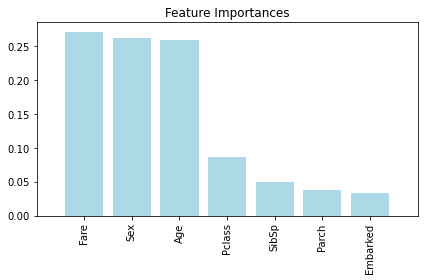

In [43]:
import matplotlib.pyplot as plt
#重要度を降順で表示
for f in range(np_x_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,
                         feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(np_x_train.shape[1]),
      importances[indices],
      color='lightblue',
      align='center')
plt.xticks(range(np_x_train.shape[1]),
          feat_labels[indices],rotation=90)
plt.xlim([-1,np_x_train.shape[1]])
plt.tight_layout()
plt.show()

重要度が低い特徴量を削除する

In [44]:
sita=0.05

feature_list=list(feat_labels[indices[:]].values.flatten())
importance_list=list(importances[indices[:]])

new_train=train
new_test=test
for i in range(len(train.columns)):
    if importance_list[i]<sita:
        del new_train[feature_list[i]]
        del new_test[feature_list[i]]
        


In [46]:
x_train=train
x_test=test

np_x_train=x_train.to_numpy()
np_x_test=x_test.to_numpy()

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import GroupKFold,GridSearchCV


In [50]:
#標準化
#stdsc=StandardScaler()
#x_train=stdsc.fit_transform(x_train)
#x_test=stdsc.fit_transform(x_test)

D:\masa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\masa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\masa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\masa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


混合行列を作る関数

In [54]:
def conf(name,confmat):
    flg,ax=plt.subplots(figsize=(5,5))
    ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
    ax.tick_params(labelsize=14)
    for i in range(confmat.shape[1]):
        for j in range(confmat.shape[1]):
            ax.ext(x=j,y=i,s=confmat[i,j],va='center',ha='center',fontsize=14)
    plt.xlabel('predicted label',fontsize=14)
    plt.ylabel('true label',fontsize=14)
    plt.savefig(name)
    

# ロジスティック回帰

In [ ]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(penalty='l2',solver='sag',random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


In [ ]:
sub=pd.read_csv('../input/titanic/gender_submission.csv')
sub['Survived']=list(map(int,y_pred))

In [ ]:
import pandas as pd
import pandas_profiling

train=pd.read_csv('../input/titanic/train.csv')
#train.profile_report()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.hist(train.loc[train['Survived']==0,'Age'].dropna(),bins=30,alpha=0.5,label='0')
plt.hist(train.loc[train['Survived']==1,'Age'].dropna(),bins=30,alpha=0.5,label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')

In [ ]:
sns.countplot(x='SibSp',hue='Survived',data=train)
plt.legend(loc='upper right',title='Survived')

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=train)
plt.legend(loc='upper right',title='Survived')

In [ ]:
plt.hist(train.loc[train['Survived']==0,'Fare'].dropna(),
        range=(0,250),bins=25,alpha=0.5,label='0')
plt.hist(train.loc[train['Survived']==1,'Fare'].dropna(),
         range=(0,250),bins=25,alpha=0.5,label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')
plt.xlim(-5,250)
         

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=train)

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=train)

In [ ]:
sns.countplot(x='Embarked',hue='Survived',data=train)

In [ ]:
data['FamilySize']=data['Parch']+data['SibSp']+1
train['FamilySize']=data['FamilySize'][:len(train)]
test['FamilySize']=data['FamilySize'][len(train):]
sns.countplot(x='FamilySize',data=train,hue='Survived')

In [ ]:
X_train

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import KFold

y_preds=[]
models=[]
oof_train=np.zeros((len(X_train),))
cv=KFold(n_splits=5,shuffle=True,random_state=0)

categorical_features=['Embarked','Pclass','Sex']

params={
    'objective':'binary',
    'max_bin':300,
    'learning_rate':0.05,
    'num_leaves':40
}

for fold_id,(train_index,valid_index) in enumerate(cv.split(X_train)):
    X_tr=X_train.loc[train_index,:]
    X_val=X_train.loc[valid_index,:]
    y_tr=y_train[train_index]
    y_val=y_train[valid_index]
    lgb_train=lgb.Dataset(X_tr,y_tr,
                          categorical_feature=categorical_features)
    lgb_eval=lgb.Dataset(X_val,y_val,reference=lgb_train,
                         categorical_feature=categorical_features)
    model=lgb.train(params,lgb_train,
                    valid_sets=[lgb_train,lgb_eval],
                    verbose_eval=10,
                    num_boost_round=1000,
                    early_stopping_rounds=10)
    oof_train[valid_index]=model.predict(X_val,num_iteration=model.best_iteration)
    y_preds.append(y_pred)
    models.append(model)
              
                          

In [ ]:
model

In [ ]:
pd.DataFrame(oof_train).to_csv('oof_train_kfold.csv',index=False)

In [ ]:
scores={
    m.best_score['valid_1']['binary_logloss'] for m in models
}
score=sum(scores)/len(scores)
print('==CV scores==')
print(scores)
print(score)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_oof=(oof_train>0.5).astype(int)
accuracy_score(y_train,y_pred_oof)

In [ ]:
len(y_preds)

In [ ]:
y_preds[0][:10]

In [ ]:
y_sub=sum(y_preds)/len(y_preds)
y_sub=(y_sub>0.5).astype(int)

ランダムフォレスト結果

In [ ]:
y_sub

In [ ]:
from sklearn.model_selection import KFold

cv=KFold(n_splits=5,shuffle=True,random_state=0)
for fold_id,(train_index,valid_index) in enumerate(cv.split(X_train)):
    X_tr=X_train.loc[train_index,:]
    X_val=X_train.loc[valid_index,:]
    y_tr=y_train[train_index]
    y_val=y_train[valid_index]
    
    print(f'fold_id:{fold_id}')
    print(f'y_tr y== rate:{sum(y_tr)/len(y_tr)}')
    print(f'y_val==1 rate:{sum(y_val)/len(y_val)}')

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
validation_list=[]
for fold_id,(train_index,valid_index) in enumerate (cv.split(X_train,y_train)):
    X_tr=X_train.loc[train_index,:]
    X_val=X_train.loc[valid_index,:]
    y_tr=y_train[train_index]
    y_val=y_train[valid_index]
    
    print(f'fold_id:{fold_id}')
    print(f'y_tr y==1 rate:{sum(y_tr/len(y_tr))}')
    print(f'y_val y==1 rate:{sum(y_val)/len(y_val)}')


In [ ]:
y_sub_csv = pd.read_csv('../input/titanic/gender_submission.csv')
y_sub_csv['Survived'] = y_sub
y_sub_csv

In [ ]:
pd.DataFrame(y_sub_csv).to_csv('submit001.csv',index=False)

In [ ]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub_pred=y_sub_csv['Survived']
sub_true=sub['Survived']
cm=confusion_matrix(sub_true,sub_pred)
print(cm)

accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print(str(accuracy)+"%")